# Challenge - Time Series Analysis

Using a different time series data set (either from FRED or elsewhere, go about the process of time series modeling. Specifically generate the following things:

dataset used: https://fred.stlouisfed.org/series/INDPRO

   *_Plot the time series, along with any logical or necessary differences to get a stationary dataset_
   
   *_Generate and interpret a PACF for the time series (and/or its differences)_
   
   *_Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data_
   
   *_Finally choose one specification and make the case for that as a logical model for your dataset_
    
This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# Industrial Production Index

In [2]:
df = pd.read_csv('indpro.csv')

# Remove NA's
df.dropna(inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204 entries, 0 to 1203
Data columns (total 2 columns):
DATE      1204 non-null object
INDPRO    1204 non-null float64
dtypes: float64(1), object(1)
memory usage: 28.2+ KB


In [4]:
df.head()

,DATE,INDPRO
0,1919-01-01,5.0124
1,1919-02-01,4.7908
2,1919-03-01,4.6524
3,1919-04-01,4.7355
4,1919-05-01,4.7632


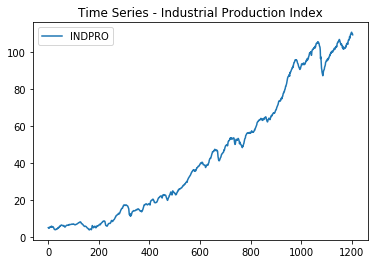

In [5]:
df.plot()
plt.title('Time Series - Industrial Production Index')
plt.show()

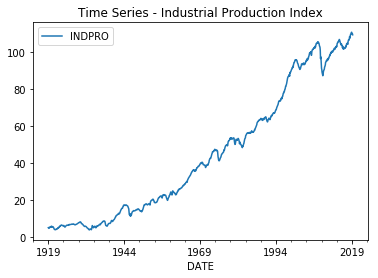

In [6]:
df.index = pd.to_datetime(df.DATE)
df.plot()
plt.title('Time Series - Industrial Production Index')
plt.show()

That's better. Now we have a sense of the amount of time actually covered by our time series. As we discussed previously, however, we need a stationary data set. This looks as though it might have a trend to it, so let's try plotting the difference.

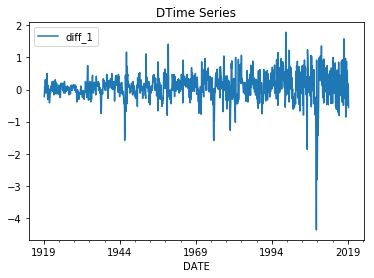

In [7]:
df['diff_1'] = df.INDPRO - df.INDPRO.shift()
df.plot(y='diff_1')
plt.title('DTime Series')
plt.show()

Text(0.5, 1.0, 'unrate PACF')

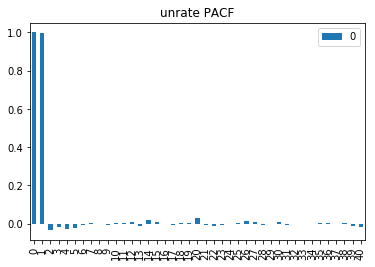

In [8]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.INDPRO))
x_acf.plot(kind='bar')
plt.title("unrate PACF")

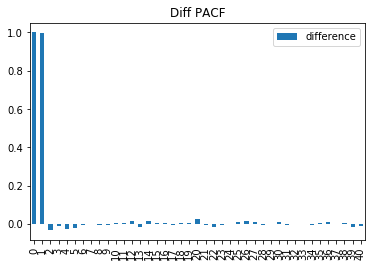

In [9]:
x_acf = pd.DataFrame(pacf(df.INDPRO.iloc[1:]))
x_acf.plot(kind='bar')
plt.title("Diff PACF")
plt.legend(['difference'])

Run Dickey-Fuller test on raw and differenced data to confirm stationary. Null Hypothesis assumes non-stationarity.

From this test, we see the time series is not stationary because the p-value is > 0.05

In [10]:
from statsmodels.tsa.stattools import adfuller

# raw data
acdf_test=adfuller(df['INDPRO'],autolag='AIC')
df_output=pd.Series(acdf_test[0:4],index=['Test Statistic','p-value','#lags used','#nobs used'])
print('raw data\n',df_output)
for k,v in acdf_test[4].items():
    print (k,v)

raw data
 Test Statistic       1.042475
p-value              0.994694
#lags used          13.000000
#nobs used        1190.000000
dtype: float64
1% -3.4358571109034814
5% -2.8639718371916243
10% -2.56806475672622


## Building models.

So our both time series has 1 strong autocorrelation. Let's build some ARIMA models to experiment and see how we do!

We're going to build a series of models to evaluate, each with slightly different parameters for the ARIMA. Note that the parameteres are passed in (p, d, q) order, corresponding to the AR, I, and MA portions respectively.

Recall how we interpret those attributes. The AR is the past values, I is the level of differencing, and MA is adjusting to past errors.

In [11]:
from statsmodels.tsa.arima_model import ARIMA
def model_time_series(p,d,q):
    model = ARIMA(df.INDPRO, order=(p,d,q))
    model_fit = model.fit()
    print(model_fit.summary())
    print('Residuals Description')
    print(model_fit.resid.describe())

In [12]:
model_time_series(1,0,0)

                              ARMA Model Results                              
Dep. Variable:                 INDPRO   No. Observations:                 1204
Model:                     ARMA(1, 0)   Log Likelihood                -674.426
Method:                       css-mle   S.D. of innovations              0.420
Date:                Tue, 04 Jun 2019   AIC                           1354.852
Time:                        08:00:49   BIC                           1370.133
Sample:                    01-01-1919   HQIC                          1360.607
                         - 04-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.3992        nan        nan        nan         nan         nan
ar.L1.INDPRO     1.0000        nan        nan        nan         nan         nan
                                    Roots   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error 

In [13]:
model_time_series(0,1,0)

                             ARIMA Model Results                              
Dep. Variable:               D.INDPRO   No. Observations:                 1203
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -639.201
Method:                           css   S.D. of innovations              0.412
Date:                Tue, 04 Jun 2019   AIC                           1282.402
Time:                        08:00:49   BIC                           1292.587
Sample:                    02-01-1919   HQIC                          1286.238
                         - 04-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0866      0.012      7.296      0.000       0.063       0.110
Residuals Description
count    1.203000e+03
mean     1.118101e-09
std      4.118140e-01
min     -4.455291e+00
25%     -1.972914e-01

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [14]:
model_time_series(0,0,1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 INDPRO   No. Observations:                 1204
Model:                     ARMA(0, 1)   Log Likelihood               -5147.310
Method:                       css-mle   S.D. of innovations             17.367
Date:                Tue, 04 Jun 2019   AIC                          10300.619
Time:                        08:00:49   BIC                          10315.899
Sample:                    01-01-1919   HQIC                         10306.374
                         - 04-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.4691      0.996     44.636      0.000      42.517      46.422
ma.L1.INDPRO     0.9914      0.003    355.415      0.000       0.986       0.997
                                    Roots   

In [15]:
model_time_series(1,1,0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.INDPRO   No. Observations:                 1203
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -578.923
Method:                       css-mle   S.D. of innovations              0.392
Date:                Tue, 04 Jun 2019   AIC                           1163.846
Time:                        08:00:49   BIC                           1179.124
Sample:                    02-01-1919   HQIC                          1169.601
                         - 04-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0862      0.016      5.281      0.000       0.054       0.118
ar.L1.D.INDPRO     0.3091      0.027     11.262      0.000       0.255       0.363
                                    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
model_time_series(0,1,1)

                             ARIMA Model Results                              
Dep. Variable:               D.INDPRO   No. Observations:                 1203
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -594.873
Method:                       css-mle   S.D. of innovations              0.397
Date:                Tue, 04 Jun 2019   AIC                           1195.747
Time:                        08:00:49   BIC                           1211.025
Sample:                    02-01-1919   HQIC                          1201.501
                         - 04-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0864      0.014      6.103      0.000       0.059       0.114
ma.L1.D.INDPRO     0.2379      0.025      9.631      0.000       0.189       0.286
                                    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [17]:
model_time_series(1,1,1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.INDPRO   No. Observations:                 1203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -538.881
Method:                       css-mle   S.D. of innovations              0.379
Date:                Tue, 04 Jun 2019   AIC                           1085.761
Time:                        08:00:50   BIC                           1106.132
Sample:                    02-01-1919   HQIC                          1093.434
                         - 04-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0850      0.027      3.108      0.002       0.031       0.139
ar.L1.D.INDPRO     0.8529      0.027     31.210      0.000       0.799       0.906
ma.L1.D.INDPRO    -0.6303      0.039

In [18]:
model_time_series(2,1,2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.INDPRO   No. Observations:                 1203
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -533.352
Method:                       css-mle   S.D. of innovations              0.377
Date:                Tue, 04 Jun 2019   AIC                           1078.704
Time:                        08:00:51   BIC                           1109.259
Sample:                    02-01-1919   HQIC                          1090.212
                         - 04-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0851      0.021      4.014      0.000       0.044       0.127
ar.L1.D.INDPRO     1.8051      0.064     28.241      0.000       1.680       1.930
ar.L2.D.INDPRO    -0.8375      0.053

In [19]:
model_time_series(3,1,3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.INDPRO   No. Observations:                 1203
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -529.757
Method:                       css-mle   S.D. of innovations              0.376
Date:                Tue, 04 Jun 2019   AIC                           1075.514
Time:                        08:00:51   BIC                           1116.254
Sample:                    02-01-1919   HQIC                          1090.859
                         - 04-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0849      0.026      3.244      0.001       0.034       0.136
ar.L1.D.INDPRO     1.6800      0.105     15.986      0.000       1.474       1.886
ar.L2.D.INDPRO    -1.5231      0.123

In [20]:
model_111 = ARIMA(df.INDPRO, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.INDPRO   No. Observations:                 1203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -538.881
Method:                       css-mle   S.D. of innovations              0.379
Date:                Tue, 04 Jun 2019   AIC                           1085.761
Time:                        08:00:52   BIC                           1106.132
Sample:                    02-01-1919   HQIC                          1093.434
                         - 04-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0850      0.027      3.108      0.002       0.031       0.139
ar.L1.D.INDPRO     0.8529      0.027     31.210      0.000       0.799       0.906
ma.L1.D.INDPRO    -0.6303      0.039

Text(0.5, 1.0, 'Histogram of Residuals')

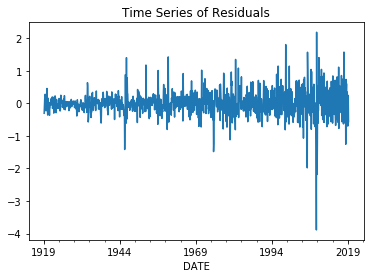

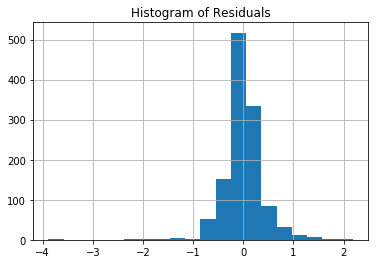

In [21]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

When we look at these residuals plots, we can make two reasonable assumptions. Firstly, there isn't a clear trend in the residuals. There are definitely places of higher volatility, and our model could be expanded to include not time series elements that could account for that variation (by that we mean typical regression coefficients as we did in the linear modeling sections before, though this would require a dataset that includes such features). However, there isn't a clear trend to the data indicating an obviously missed seasonality.

Secondly, our residuals seem approximately standard normal. There is a very long tail on the lower end, but that is a very small number of observations that are likely outliers or caused by some external influence.